In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/cardio_train.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


The Dataset contains several fields which leads to the __Presence or absence of cardiovascular disease__ within a patient.

1. __Age__ | Objective Feature | __age__ | int (days) |
2. __Height__ | Objective Feature | __height__ | int (cm) |
3. __Weight__ | Objective Feature | __weight__ | float (kg) |
4. __Gender__ | Objective Feature | __gender__ | categorical code |
5. __Systolic blood pressure__ | Examination Feature | __ap_hi__ | int |
6. __Diastolic blood pressure__ | Examination Feature | __ap_lo__ | int |
7. __Cholesterol__ | Examination Feature | __cholesterol__ | 1: normal, 2: above normal, 3: well above normal |
8. __Glucose__ | Examination Feature | __gluc__ | 1: normal, 2: above normal, 3: well above normal |
9. __Smoking__ | Subjective Feature | __smoke__ | binary |
10. __Alcohol intake__ | Subjective Feature | __alco__ | binary |
11. __Physical activity__ | Subjective Feature | __active__ | binary |
12. __Presence or absence of cardiovascular disease__ | Target Variable | __cardio__ | binary |

## Exploratory Data Analysis (EDA)

In [4]:
# checking for null values
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [5]:
# Checking the datatypes
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
#changing the datatype of weight column
df['weight'] = df['weight'].astype(int)

In [7]:
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69,130,80,2,2,0,0,1,0
1,989,14648,1,163,71,110,70,1,1,0,0,1,1
2,990,21901,1,165,70,120,80,1,1,0,0,1,0
3,991,14549,2,165,85,120,80,1,1,1,1,1,0
4,992,23393,1,155,62,120,80,1,1,0,0,1,0
5,995,21143,1,164,61,100,70,1,1,0,0,1,0
6,996,18085,1,162,72,100,70,1,1,0,0,1,0
7,997,22547,1,161,93,140,90,2,1,0,0,1,1
8,999,21250,1,157,68,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65,140,90,3,1,0,0,1,1


In [8]:
# Converting days into years in 'age' parameter
df['age'] = df['age']/365
df['age'] = df['age'].astype(int)
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0
5,995,57,1,164,61,100,70,1,1,0,0,1,0
6,996,49,1,162,72,100,70,1,1,0,0,1,0
7,997,61,1,161,93,140,90,2,1,0,0,1,1
8,999,58,1,157,68,110,80,1,1,0,0,1,0
9,1000,61,1,158,65,140,90,3,1,0,0,1,1


In [9]:
df.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [10]:
df['gender'].value_counts().to_frame()

,gender
1,45079
2,24222


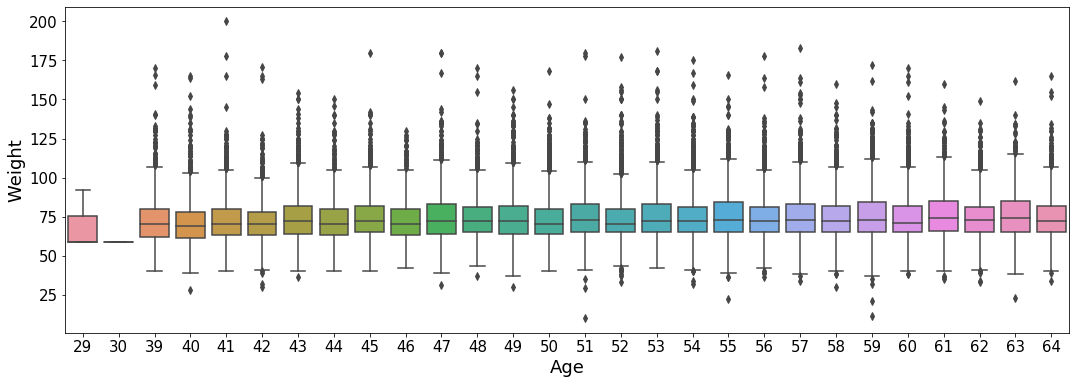

In [11]:
#box plot 
plt.figure(figsize=(18, 6))
sns.boxplot(x='age', y='weight', data=df)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Age", size=18)
plt.ylabel("Weight", size=18)
plt.show()

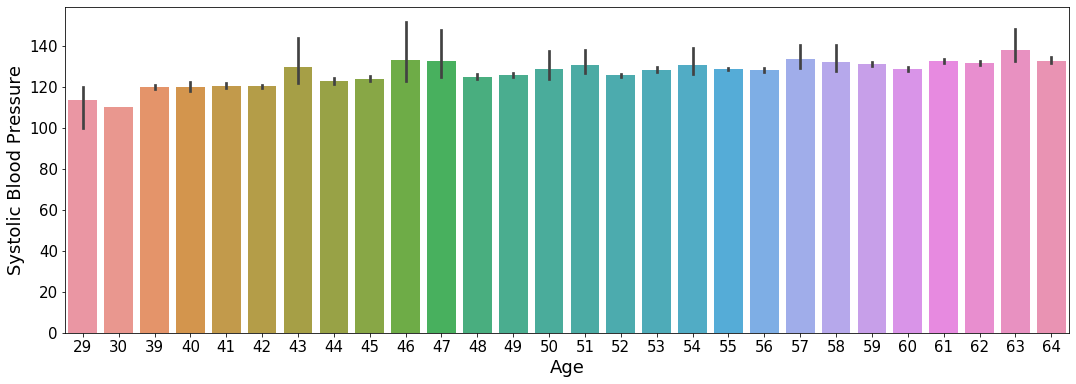

In [12]:
plt.figure(figsize=(18, 6))
sns.barplot(x= 'age', y= 'ap_hi', data= df)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Age', size= 18)
plt.ylabel('Systolic Blood Pressure', size= 18)
plt.show()

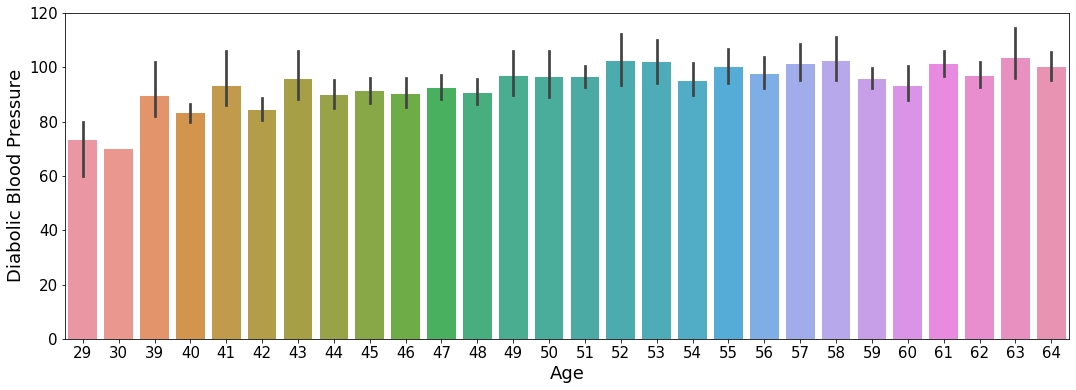

In [13]:
plt.figure(figsize=(18, 6))
sns.barplot(x= 'age', y= 'ap_lo', data= df)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Age', size= 18)
plt.ylabel('Diabolic Blood Pressure', size= 18)
plt.show()

### Feature Selection

In [14]:
#X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].values
X = df.iloc[:, 1:12].values
X[:5]

array([[ 61,   1, 155,  69, 130,  80,   2,   2,   0,   0,   1],
       [ 40,   1, 163,  71, 110,  70,   1,   1,   0,   0,   1],
       [ 60,   1, 165,  70, 120,  80,   1,   1,   0,   0,   1],
       [ 39,   2, 165,  85, 120,  80,   1,   1,   1,   1,   1],
       [ 64,   1, 155,  62, 120,  80,   1,   1,   0,   0,   1]])

In [15]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0


In [16]:
y = df['cardio'].values
y[:5]

array([0, 1, 0, 0, 0])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    lr = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(train_score, test_score, i))

Test: 0.7084367484367484 and Train: 0.7053561122013159 and Random state= 0
Test: 0.7085329485329486 and Train: 0.7084728154219093 and Random state= 1
Test: 0.7077825877825877 and Train: 0.7032205933279464 and Random state= 2
Test: 0.7125541125541126 and Train: 0.711878102274039 and Random state= 3
Test: 0.7077056277056277 and Train: 0.7074339143483782 and Random state= 4
Test: 0.7083020683020683 and Train: 0.705990996190696 and Random state= 5
Test: 0.7065319865319866 and Train: 0.7077802147062219 and Random state= 6
Test: 0.7134968734968735 and Train: 0.7075493478009928 and Random state= 7
Test: 0.711996151996152 and Train: 0.7158028396629343 and Random state= 8
Test: 0.712919672919673 and Train: 0.7087613990534457 and Random state= 9
Test: 0.7081096681096681 and Train: 0.7091076994112894 and Random state= 10
Test: 0.7121693121693121 and Train: 0.7132633037054138 and Random state= 11
Test: 0.7146320346320346 and Train: 0.7171880410943091 and Random state= 12
Test: 0.7082443482443482 a

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 7)
lr = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
yhat_logistic = lr.predict(X_test)
yhat_logistic[:15]

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, yhat_logistic, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.69      0.75      0.72      8557
    Presence       0.73      0.66      0.70      8769

    accuracy                           0.71     17326
   macro avg       0.71      0.71      0.71     17326
weighted avg       0.71      0.71      0.71     17326



### Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    train_score = gnb.score(X_train, y_train)
    test_score = gnb.score(X_test, y_test)
    
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(train_score, test_score, i))

Test: 0.5897065897065897, Train: 0.5858247720189311 and Random state: 0
Test: 0.59001443001443, Train: 0.591711878102274 and Random state: 1
Test: 0.6045598845598845, Train: 0.6022163222901997 and Random state: 2
Test: 0.5834920634920635, Train: 0.5828812189772596 and Random state: 3
Test: 0.5900913900913901, Train: 0.5861710723767748 and Random state: 4
Test: 0.588936988936989, Train: 0.589056908692139 and Random state: 5
Test: 0.6003463203463203, Train: 0.6024471891954288 and Random state: 6
Test: 0.5922077922077922, Train: 0.5769941128939167 and Random state: 7
Test: 0.589013949013949, Train: 0.586632806187233 and Random state: 8
Test: 0.5901875901875901, Train: 0.5891146254184463 and Random state: 9
Test: 0.6133525733525733, Train: 0.6111624148678287 and Random state: 10
Test: 0.5835305435305436, Train: 0.5870945399976913 and Random state: 11
Test: 0.5878018278018278, Train: 0.5941936973334873 and Random state: 12
Test: 0.5931697931697931, Train: 0.5918850282811959 and Random state

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= )
gnb = GaussianNB().fit(X_train, y_train)

In [26]:
yhat_gaussian = gnb.predict(X_test)
yhat_gaussian[:15]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [27]:
print(classification_report(y_test, yhat_gaussian, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.57      0.87      0.69      8687
    Presence       0.72      0.32      0.45      8639

    accuracy                           0.60     17326
   macro avg       0.64      0.60      0.57     17326
weighted avg       0.64      0.60      0.57     17326



### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    rfc = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= i)
    rfc.fit(X_train_scaled, y_train)
    
    train_score = rfc.score(X_train_scaled, y_train)
    test_score = rfc.score(X_test_scaled, y_test)
    
    print('Test: {:.3f}, Train: {:.3f} and Random state: {}'.format(test_score, train_score, i))

Test score: 0.7091076994112894, Train score: 0.9816835016835017 and Random state: 0
Test score: 0.7081842317903728, Train score: 0.9813371813371813 and Random state: 1
Test score: 0.7095117164954404, Train score: 0.9811255411255412 and Random state: 2
Test score: 0.7042594944014775, Train score: 0.9816642616642617 and Random state: 3
Test score: 0.7032783100542537, Train score: 0.9811832611832612 and Random state: 4
Test score: 0.7048943783908577, Train score: 0.9807792207792208 and Random state: 5
Test score: 0.7107814844742006, Train score: 0.9811255411255412 and Random state: 6
Test score: 0.7043172111277848, Train score: 0.9813949013949014 and Random state: 7
Test score: 0.7084728154219093, Train score: 0.9811255411255412 and Random state: 8
Test score: 0.7083573819692947, Train score: 0.980990860990861 and Random state: 9
Test score: 0.7085882488745239, Train score: 0.980913900913901 and Random state: 10
Test score: 0.7104929008426643, Train score: 0.9811063011063011 and Random st

In [33]:
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)
    rfc = RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state= i)
    rfc.fit(X_train, y_train)
    
    train_score = rfc.score(X_train, y_train)
    test_score = rfc.score(X_test, y_test)
    
    print('Test: {:.3f}, Train: {:.3f} and Random state: {}'.format(test_score, train_score, i))

Test score: 0.7087613990534457, Train score: 0.9817027417027417 and Random state: 0
Test score: 0.7085305321482166, Train score: 0.9813371813371813 and Random state: 1
Test score: 0.7099734503058986, Train score: 0.9811063011063011 and Random state: 2
Test score: 0.706799030358998, Train score: 0.9816835016835017 and Random state: 3
Test score: 0.7048366616645504, Train score: 0.9811640211640211 and Random state: 4
Test score: 0.7051252452960868, Train score: 0.9807792207792208 and Random state: 5
Test score: 0.7144753549578667, Train score: 0.9811447811447811 and Random state: 6
Test score: 0.7044326445803994, Train score: 0.9813949013949014 and Random state: 7
Test score: 0.7093962830428258, Train score: 0.9811447811447811 and Random state: 8
Test score: 0.7103774673900496, Train score: 0.981029341029341 and Random state: 9
Test score: 0.7091654161375966, Train score: 0.9809331409331409 and Random state: 10
Test score: 0.7058178460117742, Train score: 0.9810870610870611 and Random st

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 18)
rfc = RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state= 18).fit(X_train, y_train)

In [35]:
yhat_rfc = rfc.predict(X_test)
yhat_rfc[:15]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [36]:
print(classification_report(y_test, yhat_rfc, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.71      0.72      0.71      8667
    Presence       0.71      0.71      0.71      8659

    accuracy                           0.71     17326
   macro avg       0.71      0.71      0.71     17326
weighted avg       0.71      0.71      0.71     17326



### Adaboost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    ada = AdaBoostClassifier(n_estimators= 100, random_state= i).fit(X_train, y_train)
    
    train_score = ada.score(X_train, y_train)
    test_score = ada.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))

Test: 0.7294239870714533, Train: 0.7319480519480519 and Random state: 0
Test: 0.7322521066605102, Train: 0.7308321308321308 and Random state: 1
Test: 0.7307514717765209, Train: 0.7309475709475709 and Random state: 2
Test: 0.7289045365346878, Train: 0.7312746512746513 and Random state: 3
Test: 0.7263650005771672, Train: 0.7333525733525733 and Random state: 4
Test: 0.7296548539766824, Train: 0.7315824915824916 and Random state: 5
Test: 0.7320212397552811, Train: 0.730928330928331 and Random state: 6
Test: 0.7259609834930163, Train: 0.733044733044733 and Random state: 7
Test: 0.7325984070183539, Train: 0.7311976911976912 and Random state: 8
Test: 0.7323098233868175, Train: 0.7303511303511303 and Random state: 9
Test: 0.7329447073761977, Train: 0.7306204906204906 and Random state: 10
Test: 0.7335218746392704, Train: 0.7309475709475709 and Random state: 11
Test: 0.7319635230289738, Train: 0.7301779701779701 and Random state: 12
Test: 0.7286159529031513, Train: 0.7312361712361712 and Random 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 11)
    
ada = AdaBoostClassifier(n_estimators= 100, random_state= 11).fit(X_train, y_train)

In [51]:
yhat_ada = ada.predict(X_test)
yhat_ada[:15]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [50]:
print(classification_report(y_test, yhat_ada, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.71      0.81      0.75      8719
    Presence       0.77      0.66      0.71      8607

    accuracy                           0.73     17326
   macro avg       0.74      0.73      0.73     17326
weighted avg       0.74      0.73      0.73     17326



### Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state= i).fit(X_train, y_train)
    
    train_score = gbc.score(X_train, y_train)
    test_score = gbc.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))

Test: 0.721, Train: 0.724 and Random state: 0.000
Test: 0.725, Train: 0.723 and Random state: 1.000
Test: 0.723, Train: 0.723 and Random state: 2.000
Test: 0.722, Train: 0.724 and Random state: 3.000
Test: 0.721, Train: 0.724 and Random state: 4.000
Test: 0.722, Train: 0.724 and Random state: 5.000
Test: 0.725, Train: 0.723 and Random state: 6.000
Test: 0.720, Train: 0.724 and Random state: 7.000
Test: 0.727, Train: 0.722 and Random state: 8.000
Test: 0.726, Train: 0.722 and Random state: 9.000
Test: 0.727, Train: 0.722 and Random state: 10.000
Test: 0.729, Train: 0.721 and Random state: 11.000
Test: 0.729, Train: 0.722 and Random state: 12.000
Test: 0.724, Train: 0.723 and Random state: 13.000
Test: 0.718, Train: 0.725 and Random state: 14.000
Test: 0.722, Train: 0.724 and Random state: 15.000
Test: 0.725, Train: 0.723 and Random state: 16.000
Test: 0.723, Train: 0.723 and Random state: 17.000
Test: 0.725, Train: 0.723 and Random state: 18.000
Test: 0.720, Train: 0.724 and Random stat

In [55]:
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    
    gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, random_state= i).fit(X_train, y_train)
    
    train_score = gbc.score(X_train, y_train)
    test_score = gbc.score(X_test, y_test)
    print("Test: {:.3f}, Train: {:.3f} and Random state: {}".format(test_score, train_score, i))

Test: 0.722, Train: 0.725 and Random state: 0
Test: 0.726, Train: 0.724 and Random state: 1
Test: 0.726, Train: 0.726 and Random state: 2
Test: 0.726, Train: 0.726 and Random state: 3
Test: 0.723, Train: 0.727 and Random state: 4
Test: 0.725, Train: 0.727 and Random state: 5
Test: 0.725, Train: 0.724 and Random state: 6
Test: 0.722, Train: 0.727 and Random state: 7
Test: 0.729, Train: 0.725 and Random state: 8
Test: 0.727, Train: 0.724 and Random state: 9
Test: 0.728, Train: 0.725 and Random state: 10
Test: 0.730, Train: 0.723 and Random state: 11
Test: 0.730, Train: 0.724 and Random state: 12
Test: 0.726, Train: 0.727 and Random state: 13
Test: 0.720, Train: 0.728 and Random state: 14
Test: 0.724, Train: 0.726 and Random state: 15
Test: 0.726, Train: 0.725 and Random state: 16
Test: 0.724, Train: 0.724 and Random state: 17
Test: 0.725, Train: 0.724 and Random state: 18
Test: 0.722, Train: 0.727 and Random state: 19


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)
    
gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, random_state= 1).fit(X_train, y_train)

In [57]:
yhat_gbc = gbc.predict(X_test)
yhat_gbc[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [58]:
print(classification_report(y_test, yhat_gbc, target_names= ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.70      0.79      0.74      8684
    Presence       0.76      0.66      0.71      8642

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.72     17326
weighted avg       0.73      0.73      0.72     17326



### Artificial Neural Network

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize ANN
ann_classifier = Sequential()

# Add input and first hidden layer
ann_classifier.add(Dense(activation= 'relu', input_dim= 11, units= 7, kernel_initializer= 'uniform'))

# Add input and second hidden layer
ann_classifier.add(Dense(activation= 'relu', units= 7, kernel_initializer= 'uniform'))

# Output layer
ann_classifier.add(Dense(activation= 'sigmoid', units= 2, kernel_initializer= 'uniform'))

# Compile ANN
ann_classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
ann_classifier.add(Dense(activation= 'relu', units= 7, kernel_initializer= 'uniform'))
ann_classifier.add(Dense(activation= 'sigmoid', units= 1, kernel_initializer= 'uniform'))
ann_classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

ann_classifier.fit(np.array(X_train), np.array(y_train), batch_size= 10, epochs= 15)

Epoch 1/15
51975/51975 [==============================] - 8s 160us/step - loss: 0.6313 - accuracy: 0.6391
Epoch 2/15
51975/51975 [==============================] - 8s 156us/step - loss: 0.5825 - accuracy: 0.7097
Epoch 3/15
51975/51975 [==============================] - 8s 155us/step - loss: 0.5766 - accuracy: 0.7141
Epoch 4/15
51975/51975 [==============================] - 8s 151us/step - loss: 0.5744 - accuracy: 0.7138
Epoch 5/15
51975/51975 [==============================] - 8s 155us/step - loss: 0.5731 - accuracy: 0.7142
Epoch 6/15
51975/51975 [==============================] - 8s 153us/step - loss: 0.5718 - accuracy: 0.7160
Epoch 7/15
51975/51975 [==============================] - 8s 155us/step - loss: 0.5712 - accuracy: 0.7153
Epoch 8/15
51975/51975 [==============================] - 8s 151us/step - loss: 0.5703 - accuracy: 0.7153
Epoch 9/15
51975/51975 [==============================] - 8s 154us/step - loss: 0.5696 - accuracy: 0.7161
Epoch 10/15
51975/51975 [=====================